In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsimport
from utilities import clean_data

### Load the Data

In [18]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

In [19]:
df_brands.head()

,business_entity_doing_business_as_name,compset_group,compset,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name
0,24S,Apparel Retail,"[Apparel Retail, Ecommerce Apparel Retail, Eco...",LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris
1,3.1 Phillip Lim,Luxury & Premium & Mainstream,"[Luxury & Premium & Mainstream, Soft Luxury, U...",Alexander Wang Inc,None,Alexander Wang Inc,None
2,3CE,Beauty & Boutique,[Beauty & Boutique],L'Oreal,France,L'Oreal,Euronext Paris
3,A. Lange & Soehne,Luxury & Premium & Mainstream,"[Hard Luxury, Luxury & Premium & Mainstream]",Richemont,Switzerland,Richemont,Six Swiss Exchange
4,ANIMALE,Apparel Retail,[Apparel Retail],GRUPO DE MODA SOMA SA,Brazil,GRUPO DE MODA SOMA SA,Bolsa de Valores de Sao Paulo (XBSP)


In [44]:
df

,period_end_date,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes
239152,2017-05-06,24S,-1.0,-1.0,-1.0,-1.0,-1.0
239162,2017-05-13,24S,-1.0,6.0,3.0,57.0,1765.0
239538,2017-05-20,24S,-1.0,6.0,3.0,57.0,1765.0
239200,2017-05-27,24S,-1.0,6.0,3.0,57.0,1765.0
239161,2017-06-03,24S,-1.0,24.0,3.0,109.0,3922.0
...,...,...,...,...,...,...,...
647869,2023-08-19,shopDisney,4221812.0,266.0,52.0,3099.0,266166.0
647742,2023-08-26,shopDisney,4224473.0,265.0,61.0,3494.0,316126.0
647803,2023-09-02,shopDisney,4228605.0,268.0,61.0,3920.0,341795.0
647623,2023-09-09,shopDisney,4233764.0,259.0,56.0,3700.0,335231.0


In [6]:
# Load the data
dir = '../data/'
df = pd.read_csv(dir + 'date_brand_figures.csv', header=0, sep=';')
df_brands = pd.read_csv(dir + 'date_brand_features.csv', header=0, sep=';')
df_allbrands = pd.read_csv(dir + 'all_brands.csv', header=0, sep=';')


In [20]:
df.head()

,period_end_date,business_entity_doing_business_as_name,followers,pictures,videos,comments,likes
239152,2017-05-06,24S,-1.0,-1.0,-1.0,-1.0,-1.0
239162,2017-05-13,24S,-1.0,6.0,3.0,57.0,1765.0
239538,2017-05-20,24S,-1.0,6.0,3.0,57.0,1765.0
239200,2017-05-27,24S,-1.0,6.0,3.0,57.0,1765.0
239161,2017-06-03,24S,-1.0,24.0,3.0,109.0,3922.0


### Time Series Plot for Top-10 Brands

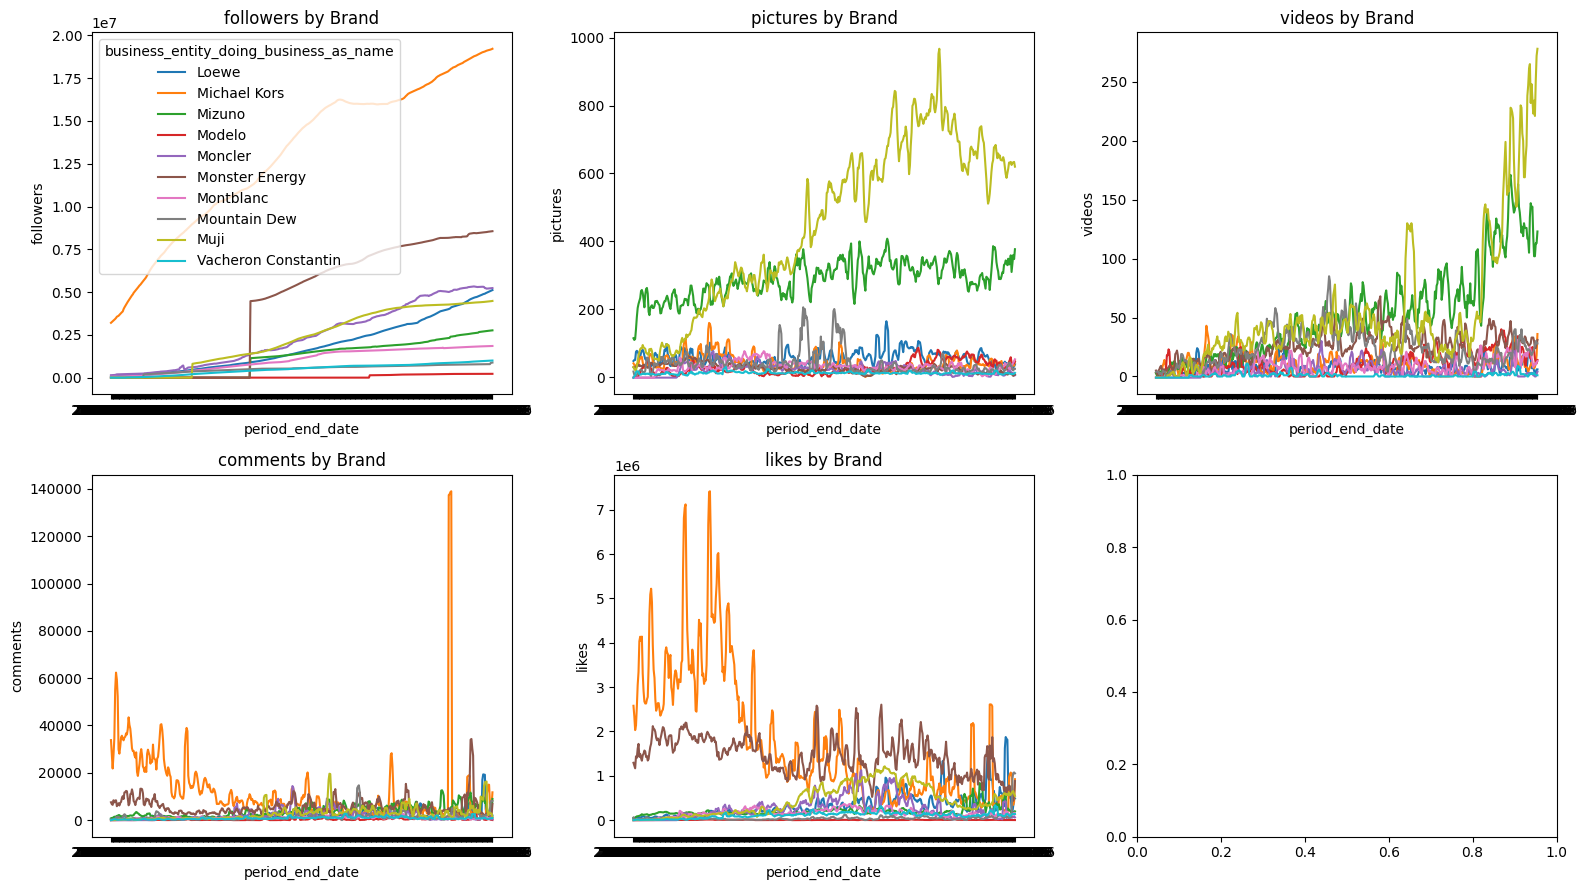

In [21]:
df_sorted = df.sort_values(by=['business_entity_doing_business_as_name', 'period_end_date'])
df_10_brands = df_sorted[df_sorted['business_entity_doing_business_as_name'].isin(df_sorted['business_entity_doing_business_as_name'].value_counts().head(10).index)]
trends_columns = df.columns[-5:]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
for index, column in enumerate(trends_columns):
    legend = True if index == 0 else False
    sns.lineplot(data=df_10_brands, x='period_end_date', y=column, hue='business_entity_doing_business_as_name', palette='tab10', ax=axes[index//3, index%3], legend=legend)
    axes[index//3, index%3].set_title(f'{column} by Brand')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

### Time Series Plot for All Brands

In [22]:
df_allbrands.head()

,period_end_date,compset_group,compset,followers,pictures,videos,comments,likes
365993,2019-01-05,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,577822196.0,10851.0,1726.0,711070.0,110228425.0
365994,2020-10-10,Apparel Retail,Omnichannel Apparel Retail,374077484.0,13141.0,1352.0,659640.0,71433543.0
365995,2021-05-15,Fitness & Exercise,Fitness & Exercise,12247138.0,2207.0,570.0,81662.0,1814642.0
365996,2023-05-27,Food Products,Snack Bars,2053344.0,147.0,81.0,56011.0,48641.0
365997,2023-05-06,Food Products,Food Products,8001015.0,538.0,439.0,71680.0,258727.0


In [23]:
df_allbrands_sorted = df_allbrands.sort_values(by=['period_end_date'])

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_56282/1228587240.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_allbrands_sorted, x='perio

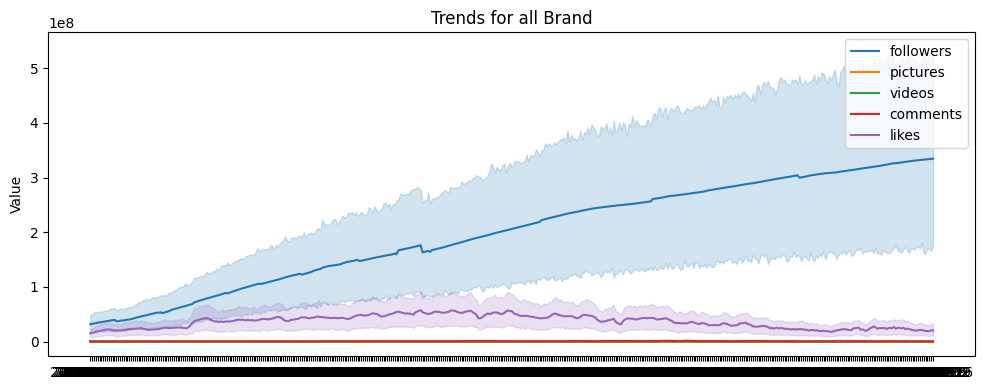

In [24]:
columns = df_allbrands_sorted.columns[-5:]
plt.figure(figsize=(10, 4))
for index, column in enumerate(columns):
    sns.lineplot(data=df_allbrands_sorted, x='period_end_date', y=column, palette='tab10', label = column)
plt.xlabel('')
plt.ylabel('Value')
plt.title('Trends for all Brand')
plt.tight_layout()
plt.show()

In [25]:
df_allbrands_sorted.head()

,period_end_date,compset_group,compset,followers,pictures,videos,comments,likes
379874,2015-01-03,Luxury & Premium & Mainstream,Hard Luxury,5208585.0,431.0,32.0,27745.0,1249952.0
372162,2015-01-03,Restaurants,QSR,136754.0,2193.0,89.0,35890.0,1113280.0
368409,2015-01-03,Apparel Retail,US Discount Store,434875.0,203.0,NaN,10537.0,560780.0
383535,2015-01-03,Fitness & Exercise,Fitness & Exercise,NaN,245.0,30.0,6393.0,97589.0
380986,2015-01-03,Sporting Goods,Sporting Goods,305402.0,129.0,13.0,17864.0,844336.0


## Dimensionality Reduction Techniques

### PCA

In [27]:
df_brands.head()

,business_entity_doing_business_as_name,compset_group,compset,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name
0,24S,Apparel Retail,"[Apparel Retail, Ecommerce Apparel Retail, Eco...",LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris
1,3.1 Phillip Lim,Luxury & Premium & Mainstream,"[Luxury & Premium & Mainstream, Soft Luxury, U...",Alexander Wang Inc,None,Alexander Wang Inc,None
2,3CE,Beauty & Boutique,[Beauty & Boutique],L'Oreal,France,L'Oreal,Euronext Paris
3,A. Lange & Soehne,Luxury & Premium & Mainstream,"[Hard Luxury, Luxury & Premium & Mainstream]",Richemont,Switzerland,Richemont,Six Swiss Exchange
4,ANIMALE,Apparel Retail,[Apparel Retail],GRUPO DE MODA SOMA SA,Brazil,GRUPO DE MODA SOMA SA,Bolsa de Valores de Sao Paulo (XBSP)


In [39]:
def split_compset(compset):
    if type(compset) == str:
        return [item.strip() for item in compset.split('&')]
    elif type(compset) == list:
        new_compset = []
        for item in compset:
            new_compset.extend([item.strip() for item in item.split('&')])
        return new_compset

In [40]:
df_brands['compset'] = df_brands['compset'].apply(split_compset)

In [42]:
df_brands['compset_group'] = df_brands['compset'].apply(split_compset)

In [43]:
df_brands.head()

,business_entity_doing_business_as_name,compset_group,compset,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name
0,24S,"[Apparel Retail, Ecommerce Apparel Retail, Eco...","[Apparel Retail, Ecommerce Apparel Retail, Eco...",LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris
1,3.1 Phillip Lim,"[Luxury, Premium, Mainstream, Soft Luxury, US ...","[Luxury, Premium, Mainstream, Soft Luxury, US ...",Alexander Wang Inc,None,Alexander Wang Inc,None
2,3CE,"[Beauty, Boutique]","[Beauty, Boutique]",L'Oreal,France,L'Oreal,Euronext Paris
3,A. Lange & Soehne,"[Hard Luxury, Luxury, Premium, Mainstream]","[Hard Luxury, Luxury, Premium, Mainstream]",Richemont,Switzerland,Richemont,Six Swiss Exchange
4,ANIMALE,[Apparel Retail],[Apparel Retail],GRUPO DE MODA SOMA SA,Brazil,GRUPO DE MODA SOMA SA,Bolsa de Valores de Sao Paulo (XBSP)
